In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.tree import DecisionTreeRegressor 
from sklearn.svm import SVR 
from statistics import mean,median,mode


In [2]:
df = pd.read_csv('Downloads\Life_Expectancy_Data.csv')

In [3]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [4]:
df.drop(df[df['Life expectancy '].isnull()==True].index ,inplace=True)
df.drop('Population',axis=1,inplace=True)
df.reset_index(inplace=True)

In [5]:
def knn_impute(x,k):
    i = KNNImputer(n_neighbors=k)
    return pd.DataFrame(i.fit_transform(x))

In [6]:
df.corr()

,index,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
index,1.000000,-0.005432,-0.015469,0.037102,-0.029293,-0.063492,-0.031954,-0.018835,-0.022271,0.017070,-0.025257,0.019226,0.052409,-0.005433,0.091739,-0.017336,0.009387,0.023876,-0.027152,-0.026429
Year,-0.005432,1.000000,0.170033,-0.079052,-0.036464,-0.049175,0.032723,0.105898,-0.081840,0.104668,-0.041980,0.094498,0.087309,0.134817,-0.138789,0.102707,-0.045082,-0.048152,0.242953,0.213265
Life expectancy,-0.015469,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,0.037102,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.029293,-0.036464,-0.196557,0.078756,1.000000,-0.116647,-0.085906,-0.224750,0.501038,-0.227480,0.996628,-0.171063,-0.128826,-0.175539,0.024955,-0.108643,0.465700,0.471340,-0.145018,-0.195202
Alcohol,-0.063492,-0.049175,0.404877,-0.195848,-0.116647,1.000000,0.341112,0.086217,-0.052569,0.338253,-0.113388,0.222057,0.302902,0.222378,-0.049918,0.354406,-0.432302,-0.420862,0.450254,0.548001
percentage expenditure,-0.031954,0.032723,0.381864,-0.242860,-0.085906,0.341112,1.000000,0.016704,-0.056831,0.231130,-0.088152,0.147664,0.176245,0.144022,-0.098230,0.899370,-0.252397,-0.253931,0.382244,0.391466
Hepatitis B,-0.018835,0.105898,0.256762,-0.162476,-0.224750,0.086217,0.016704,1.000000,-0.121211,0.155174,-0.234353,0.483989,0.070983,0.610199,-0.113395,0.083918,-0.122479,-0.127039,0.199141,0.222895
Measles,-0.022271,-0.081840,-0.157586,0.031176,0.501038,-0.052569,-0.056831,-0.121211,1.000000,-0.176069,0.507718,-0.136460,-0.106405,-0.142174,0.030673,-0.076646,0.224579,0.220836,-0.129465,-0.138344
BMI,0.017070,0.104668,0.567694,-0.387017,-0.227480,0.338253,0.231130,0.155174,-0.176069,1.000000,-0.237910,0.287579,0.238765,0.286077,-0.243735,0.304442,-0.530805,-0.537784,0.509299,0.558363


Filling NaN values 

In [7]:
df['Alcohol'].fillna(df['Alcohol'].median(),inplace=True)
df[' BMI '].fillna(df[' BMI '].mean(),inplace=True)
df['Polio'].fillna(df['Polio'].mean(),inplace=True)
df['Diphtheria '].fillna(df['Diphtheria '].mean(),inplace=True)
df['Total expenditure'].fillna(df['Total expenditure'].mean(),inplace=True)
df[' thinness  1-19 years'].fillna(df[' thinness  1-19 years'].mean(),inplace=True)
df[' thinness 5-9 years'].fillna(df[' thinness 5-9 years'].mean(),inplace=True)

In [8]:
# Income and Schooling 

df_ = df[['Income composition of resources','Schooling']]

i = knn_impute(df_,36)
df['Income composition of resources']=i.iloc[:,0]
df['Schooling'] = i.iloc[:,1]

# GDP 

df_ = df[['GDP','percentage expenditure']]
i = knn_impute(df_,36)
df['GDP'] = i.iloc[:,0]
df['percentage expenditure'] = i.iloc[:,1]

# Hepatatis B

df_ = df[['Hepatitis B','Diphtheria ']]
i = knn_impute(df_,36)
df['Hepatitis B']= i.iloc[:,0]

In [9]:
df.isnull().sum()

index                              0
Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [10]:
df['Year'] = df['Year'].apply(str)
cat_feature = ['Country','Year','Status']
for i in cat_feature:
    dummy = pd.get_dummies(df[i])
    df.drop(i,axis=1,inplace=True)
    df=pd.concat([df,dummy],axis=1)
    
df.drop('index',axis=1,inplace=True)    

In [11]:
df.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,2008,2009,2010,2011,2012,2013,2014,2015,Developed,Developing
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,0,0,0,0,0,0,0,1,0,1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,0,0,0,0,0,0,1,0,0,1
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,0,0,0,0,0,1,0,0,0,1
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,0,0,0,0,1,0,0,0,0,1
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,0,0,0,1,0,0,0,0,0,1


Removing outliers 

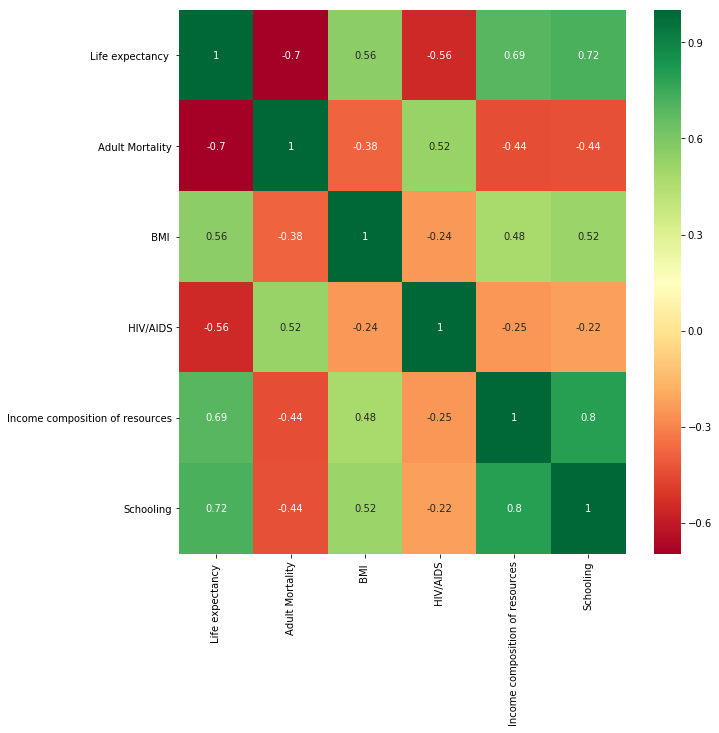

In [12]:
corrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat["Life expectancy "]) > 0.5]
plt.figure(figsize=(10, 10))
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

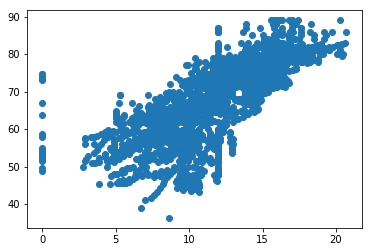

In [13]:
plt.scatter(df['Schooling'],df['Life expectancy '])

In [14]:
df.drop(df[(df['Schooling']<2)&(df['Life expectancy ']>40)].index,inplace=True)

Multicolinearity 

In [38]:
#df.drop('infant deaths',axis = 1,inplace = True)

Feature Scaling 

In [39]:
def scaler(x_train,x_test):
    sc = StandardScaler()
    x_train = pd.DataFrame(sc.fit_transform(x_train))
    x_test = pd.DataFrame(sc.transform(x_test))
    return x_train,x_test 
    

In [40]:
x = df.drop('Life expectancy ',axis=1)
y = df['Life expectancy ']

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=10)

In [42]:
x_train,x_test = scaler(x_train,x_test)

In [43]:
model = DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [44]:
model.score(x_test,y_test)

0.9212205127621595